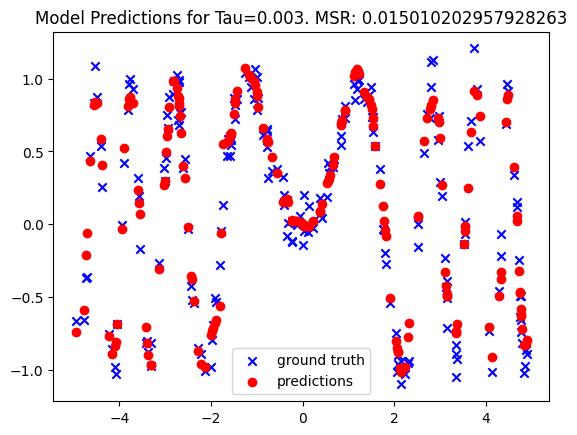

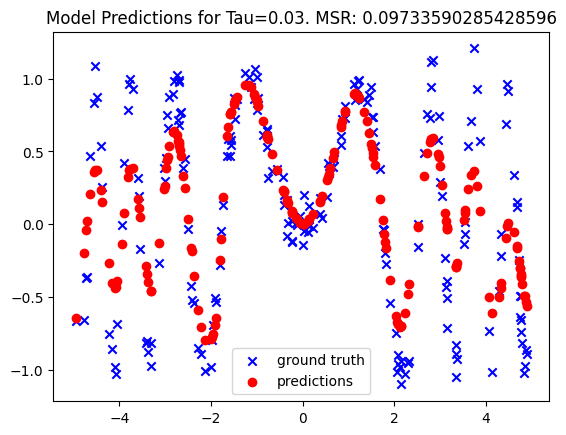

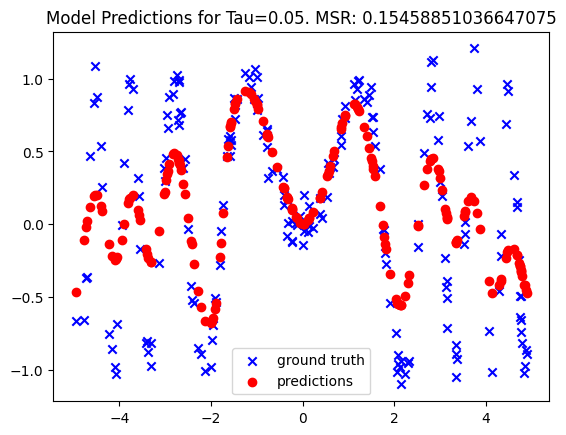

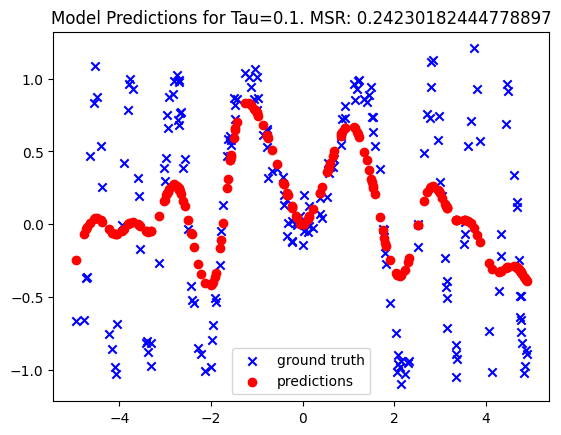

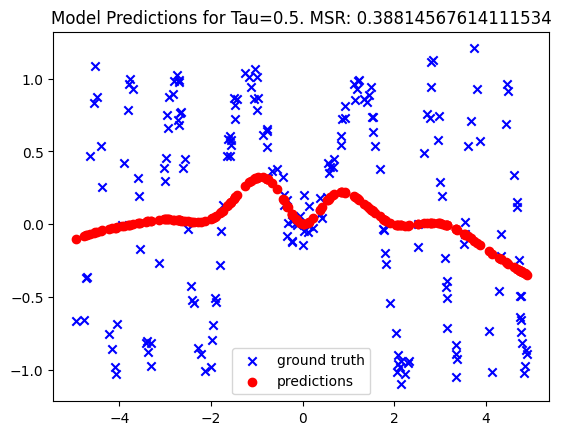

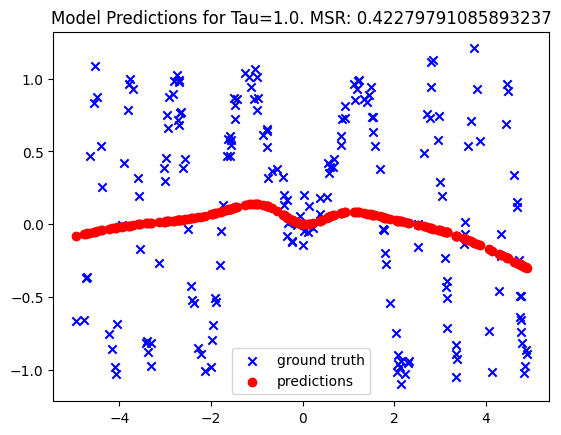

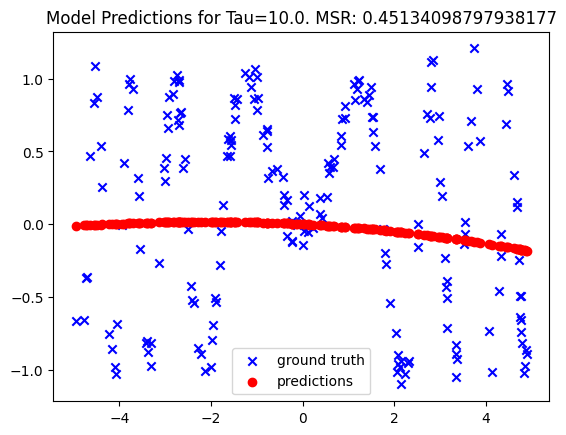

Tau with lowest loss: 0.003


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import util
import pandas as pd
import os

from lwr import LocallyWeightedLinearRegression


def main(tau_values, train_path, valid_path, test_path, pred_path):
    """Problem 5(b): Tune the bandwidth paramater tau for LWR.

    Args:
        tau_values: List of tau values to try.
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
    x_eval, y_eval = util.load_dataset(valid_path, add_intercept=False)
    x_test, y_test = util.load_dataset(test_path, add_intercept=False)

    loss_dict = {}
    y_preds_master = {"Ground truth" : y_eval}
    for tau in tau_values:
        clf = LocallyWeightedLinearRegression(tau=tau)
        clf.fit(x=x_train, y=y_train)
        y_preds = clf.predict(x=x_eval)

        MSR_loss = np.sum((np.add(y_preds, - y_eval))**2) / len(y_eval)

        loss_dict[f"tau={tau}"] = MSR_loss
        y_preds_master[f"tau={tau}"] = y_preds

        plt.scatter(x_eval, y_eval, marker='x', color='b', label="ground truth")
        plt.scatter(x_eval, y_preds, marker='o', color='r', label="predictions")
        plt.title(f"Model Predictions for Tau={tau}. MSR: {MSR_loss}")
        plt.legend()
        plt.show()

    index_min = np.argmin(list(loss_dict.values()))
    print(f"Tau with lowest loss: {tau_values[index_min]}")

    #Save predictions for differing values of tau
    master_df = pd.DataFrame(y_preds_master)
    master_df.to_csv(os.path.join(pred_path, "p05_tau_predictions.csv"), index=False)


tau_values = [3e-3, 3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]
train_path = 'data/ds5_train.csv'
valid_path = 'data/ds5_valid.csv'
test_path = 'data/ds5_test.csv'
pred_path = 'predictions/'

main(
    tau_values=tau_values,
    train_path=train_path,
    valid_path=valid_path,
    test_path=test_path,
    pred_path=pred_path
)
